### Mountain Car Control Problem
##### Solved by Using Reinforcement Learning with Deep Q Network
References:
- https://gymnasium.farama.org/environments/classic_control/mountain_car/
- https://github.com/Bduz/intro_pytorch/tree/main/intro_rl/dqn

**Description:**
The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction. The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill. There are two versions of the mountain car domain in gymnasium: one with discrete actions and one with continuous. This version is the one with discrete actions.
This MDP first appeared in Andrew Moore’s PhD Thesis (1990)

### 1 - Importing Necessary Libraries

In [2]:
# Importing Necessary Libraries
import gym
from gym.error import DependencyNotInstalled
from gym.wrappers import HumanRendering
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import torch
import random
import sys
import os
import pygame
# from pygame import gfxdraw
# os.environ['SDL_VIDEODRIVER']='dummy'
# pygame.display.set_mode((640,480))


### 2 - Initialize the Environment and the Agent

In [5]:
# Instantiate the Environment and Agent
env = gym.make('MountainCar-v0', render_mode="rgb_array")
# env.seed(0)   # 'MountainCarEnv' object has no attribute 'seed'
print('State shape: ', env.observation_space.shape) # (2,)
print('Number of actions: ', env.action_space.n)    # 3, discreate

State shape:  (2,)
Number of actions:  3


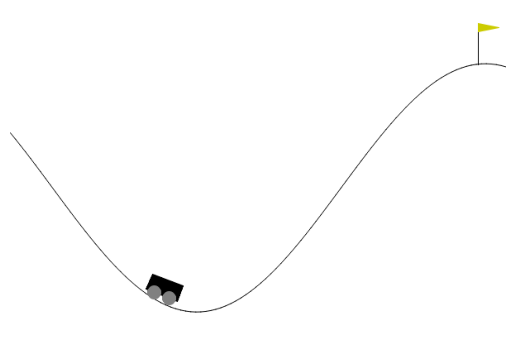

In [8]:
# Watch an Untrained Agent
# from matplotlib.animation import FuncAnimation

state = env.reset()
img = plt.imshow(env.render())
for j in range(1000):
    action = env.action_space.sample()
    img.set_data(env.render())
    plt.axis('off')
    #display(plt.gcf())
    display(wait=True)
    state, reward, done, _, _ = env.step(action)
    if done:
        break
env.close()


### 3 - Train the Agent with DQN

In [ ]:
# Import the Agent
from DQN_Agent import DQN_Agent
agent = DQN_Agent(state_size=2, action_size=3, seed=0)

def dqn(n_episodes=2000, max_t=1000,eps_start=1, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    Params
    ======
        n_episodes (int): Maximum number of training episodes. In this case, it is 2000.
        max_t (int): Maximum number of timesteps per episode. In this case, it is 1000.
        eps_start (float): Starting value of epsilon, for epsilon-greedy action selection. In this case, it is 1.
        eps_end (float): Minimum value of epsilon. In this case, it is 0.01.
        eps_decay (float): Multiplicative factor (per episode) for decreasing epsilon. In this case, it is 0.995.
    """
    # Initialize the environment
    env = gym.make('MountainCar-v0')
    # Defining the env.step(action) outputs: next_state, reward, done, info
    # Defining the env.step(action) outputs 2: next_state, reward, done, info, next_action
    # Defining the env.step(action) outputs 3: next_state, reward, done, info, next_action, next_action_prob

    # Set the seed # 'MountainCarEnv' object has no attribute 'seed'
    env.reset()[0]
    # Initialize the scores
    scores = []
    # Initialize the scores (last 100 episodes)
    scores_window = deque(maxlen=100)
    # Initialize epsilon
    eps = eps_start

    # Loop through episodes
    for i_episode in range(1, n_episodes+1):
        # Reset the environment
        state = env.reset()[0]
        # Initialize the score
        score = 0
        # Loop through time steps
        for t in range(max_t):
            # Select an action
            action = agent.act(state, eps)
            # Take action
            next_state, reward, done, _, _ = env.step(action)
            # Update the score
            score += reward
            # Learn
            agent.step(state, action, reward, next_state, done)
            # Update the state
            state = next_state
            # Exit loop if episode finished
            if done:
                break
        # Save most recent score (last 100 episodes)
        scores_window.append(score)
        # Save most recent score (all episodes)
        scores.append(score)
        # Decrease epsilon (epsilon-greedy)
        eps = max(eps_end, eps_decay*eps)
        # Print episode number and average score (last 100 episodes)
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        # Print episode number and average score (last 100 episodes)
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        # Check if environment is solved (according to OpenAI Gym)
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            # Save the weights
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    # return scores
    return scores

scores = dqn()
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()